In [10]:
from surprise import SVD
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader
import pandas as pd 
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Question 3a Reading data from ratings_small.csv
file_path = os.path.expanduser('ratings_small.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines = 1)
df = Dataset.load_from_file(file_path, reader=reader)

In [12]:
#Question 3c & 3d Probabilistic Matrix Factorization
algo = SVD(biased= False)
cross_validate(algo, df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0077  0.9997  1.0120  1.0212  1.0081  1.0098  0.0070  
MAE (testset)     0.7784  0.7726  0.7794  0.7895  0.7772  0.7794  0.0056  
Fit time          4.20    4.21    4.56    4.90    4.79    4.53    0.29    
Test time         0.16    0.13    0.14    0.18    0.14    0.15    0.02    


{'test_rmse': array([1.00771258, 0.99971329, 1.01203124, 1.02121658, 1.00811168]),
 'test_mae': array([0.77837296, 0.77255146, 0.77941517, 0.78948895, 0.77716081]),
 'fit_time': (4.198759078979492,
  4.2057812213897705,
  4.561837911605835,
  4.897944211959839,
  4.790226936340332),
 'test_time': (0.16252565383911133,
  0.13065075874328613,
  0.13759613037109375,
  0.18347811698913574,
  0.1415860652923584)}

In [13]:
# User based Collaborative Filtering
algo = KNNBasic(sim_options = {
    'user_based': True
})
cross_validate(algo, df, measures=['RMSE','MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9585  0.9690  0.9736  0.9771  0.9621  0.9680  0.0069  
MAE (testset)     0.7355  0.7475  0.7482  0.7497  0.7401  0.7442  0.0055  
Fit time          0.21    0.25    0.25    0.28    0.24    0.25    0.02    
Test time         1.69    1.65    1.49    1.41    1.53    1.55    0.10    


{'test_rmse': array([0.95845906, 0.96899739, 0.97355957, 0.97708418, 0.96212312]),
 'test_mae': array([0.73551076, 0.74748292, 0.74822452, 0.74973777, 0.7400951 ]),
 'fit_time': (0.20644664764404297,
  0.2539534568786621,
  0.25228357315063477,
  0.2822146415710449,
  0.2442913055419922),
 'test_time': (1.6855485439300537,
  1.645601511001587,
  1.4890215396881104,
  1.406294584274292,
  1.533954381942749)}

In [14]:
#Item based Collaborative Filtering
algo = KNNBasic(sim_options = {
    'user_based': False
})
cross_validate(algo, df, measures=['RMSE','MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9384  0.9252  0.9329  0.9347  0.9418  0.9346  0.0056  
MAE (testset)     0.7251  0.7111  0.7198  0.7222  0.7261  0.7209  0.0053  
Fit time          3.68    3.46    3.59    3.40    3.46    3.52    0.10    
Test time         5.66    5.99    6.14    5.91    5.78    5.90    0.17    


{'test_rmse': array([0.9383967 , 0.92521636, 0.93288643, 0.93473386, 0.94178154]),
 'test_mae': array([0.72505054, 0.7111251 , 0.71977678, 0.72220597, 0.72610039]),
 'fit_time': (3.6842846870422363,
  3.455723762512207,
  3.592442274093628,
  3.397914409637451,
  3.4597058296203613),
 'test_time': (5.657930374145508,
  5.989024639129639,
  6.140532970428467,
  5.913226366043091,
  5.780534267425537)}

In [15]:
# Question 3e Impact of cosine, MSD and Pearson similarities on User-based collaborative filtering.
algo = KNNBasic(sim_options = {
        'name': 'MSD',
        'user_based': True 
        })
perf_UserBased_MSD = cross_validate(algo, df, measures=['RMSE','MAE'], cv=5, verbose=True)

#User-based collaborative filtering. Cosine
algo = KNNBasic(sim_options = {
        'name': 'cosine',
        'user_based': True 
        })
perf_UserBased_cosine = cross_validate(algo, df, measures=['RMSE','MAE'], cv=5, verbose=True)

#User-based collaborative filtering. Pearson.
algo = KNNBasic(sim_options = {
        'name': 'pearson',
        'user_based': True 
        })
perf_UserBased_pearson = cross_validate(algo, df, measures=['RMSE','MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9768  0.9603  0.9653  0.9696  0.9626  0.9669  0.0058  
MAE (testset)     0.7488  0.7374  0.7458  0.7448  0.7397  0.7433  0.0042  
Fit time          0.18    0.20    0.20    0.20    0.20    0.19    0.01    
Test time         1.67    1.48    1.40    1.52    1.38    1.49    0.11    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done co

In [16]:
#  Impact of cosine, MSD and Pearson similarities on Item-based collaborative filtering. 
algo = KNNBasic(sim_options = {
        'name': 'MSD',
        'user_based': False 
        })
perf_ItemBased_MSD = cross_validate(algo, df, measures=['RMSE','MAE'], cv=5, verbose=True)

# Item-based collaborative filtering. Cosine. 
algo = KNNBasic(sim_options = {
        'name': 'cosine',
        'user_based': False 
        })
perf_ItemBased_cosine = cross_validate(algo, df, measures=['RMSE','MAE'], cv=5, verbose=True)

# Item-based collaborative filtering. Pearson. 
algo = KNNBasic(sim_options = {
        'name': 'pearson',
        'user_based': False 
        })
perf_ItemBased_pearson =cross_validate(algo, df, measures=['RMSE','MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9369  0.9367  0.9364  0.9320  0.9362  0.9356  0.0018  
MAE (testset)     0.7231  0.7224  0.7190  0.7202  0.7219  0.7213  0.0015  
Fit time          3.80    3.61    3.39    3.50    3.45    3.55    0.14    
Test time         5.81    5.81    5.75    5.84    5.97    5.84    0.07    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done co

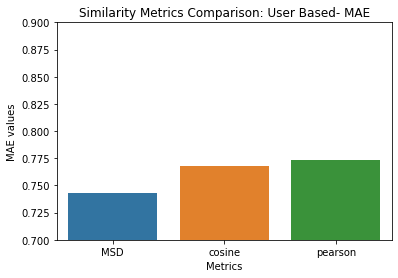

[0.7432879776518904, 0.7674689005346464, 0.7729884319248896]


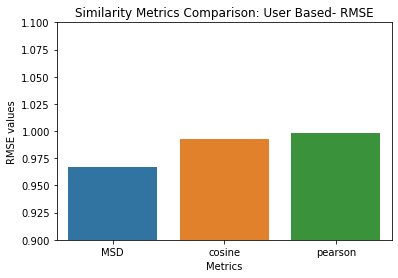

[0.9669118810020974, 0.9931229123455168, 0.9986811239573671]


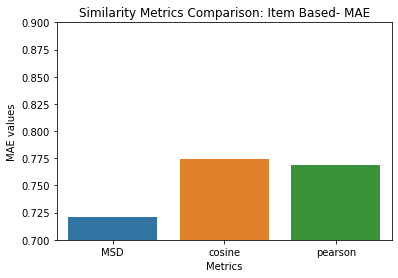

[0.7213212121470371, 0.7739727086987009, 0.7686450204114484]


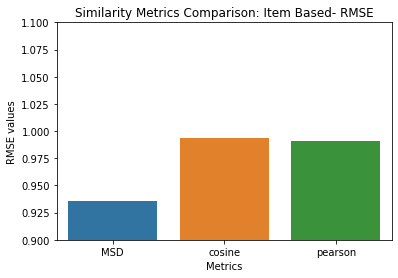

[0.9356269143701936, 0.993827454565549, 0.9904993708157231]


In [17]:
#RMSE, MAE values for Plots cosine, MSD and Pearson similarities on Item-based & user based collaborative filtering.
vals = [np.mean(perf_UserBased_MSD['test_mae']), np.mean(perf_UserBased_cosine['test_mae']), np.mean(perf_UserBased_pearson['test_mae'])]
metrics = np.array(['MSD', 'cosine', 'pearson'])
series = pd.Series(name='MAE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: User Based- MAE")
ax.set_ylabel('MAE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.7, 0.9)
plt.show()
print(vals)

vals = [np.mean(perf_UserBased_MSD['test_rmse']), np.mean(perf_UserBased_cosine['test_rmse']), np.mean(perf_UserBased_pearson['test_rmse'])]
metrics = np.array(['MSD', 'cosine', 'pearson'])
series = pd.Series(name='RMSE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: User Based- RMSE")
ax.set_ylabel('RMSE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.9,1.1)
plt.show()
print(vals)

vals = [np.mean(perf_ItemBased_MSD['test_mae']), np.mean(perf_ItemBased_cosine['test_mae']), np.mean(perf_ItemBased_pearson['test_mae'])]
metrics = np.array(['MSD', 'cosine', 'pearson'])
series = pd.Series(name='MAE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: Item Based- MAE")
ax.set_ylabel('MAE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.7, 0.9)
plt.show()
print(vals)

vals = [np.mean(perf_ItemBased_MSD['test_rmse']), np.mean(perf_ItemBased_cosine['test_rmse']), np.mean(perf_ItemBased_pearson['test_rmse'])]
metrics = np.array(['MSD', 'cosine', 'pearson'])
series = pd.Series(name='RMSE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: Item Based- RMSE")
ax.set_ylabel('RMSE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.9,1.1)
plt.show()
print(vals)

In [18]:
# Question 3f impact of number of neighbors k on performance of user based CF
RMSE_ub_CF_k = []
MAE_ub_CF_k = []
for i in range(1,31):
    algo = KNNBasic(sim_options = {
        'name': 'MSD',
        'user_based': True 
        })
    print("K= ", i)
    perf_UserBased_MSD = cross_validate(algo, df, measures=['RMSE','MAE'], cv=5, verbose=True)
    print('-----------------------------------------------------------------------')
    RMSE_ub_CF_k.append(np.mean(perf_UserBased_MSD['test_rmse']))
    MAE_ub_CF_k.append(np.mean(perf_UserBased_MSD['test_mae']))               

K=  1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9698  0.9656  0.9661  0.9623  0.9732  0.9674  0.0037  
MAE (testset)     0.7478  0.7409  0.7429  0.7389  0.7499  0.7441  0.0041  
Fit time          0.19    0.19    0.19    0.19    0.19    0.19    0.00    
Test time         1.40    1.43    1.39    1.39    1.34    1.39    0.03    
-----------------------------------------------------------------------
K=  2
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done 

Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9730  0.9667  0.9681  0.9626  0.9633  0.9667  0.0037  
MAE (testset)     0.7471  0.7434  0.7448  0.7397  0.7423  0.7435  0.0025  
Fit time          0.17    0.19    0.21    0.19    0.19    0.19    0.01    
Test time         1.39    1.40    1.31    1.41    1.31    1.36    0.04    
-----------------------------------------------------------------------
K=  11
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean 

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9737  0.9662  0.9555  0.9713  0.9670  0.9667  0.0063  
MAE (testset)     0.7469  0.7427  0.7355  0.7474  0.7428  0.7431  0.0043  
Fit time          0.17    0.28    0.19    0.19    0.20    0.21    0.04    
Test time         1.45    1.50    1.41    1.42    1.41    1.44    0.04    
-----------------------------------------------------------------------
K=  21
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the m

Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9678  0.9739  0.9678  0.9671  0.9669  0.9687  0.0026  
MAE (testset)     0.7475  0.7500  0.7441  0.7404  0.7435  0.7451  0.0033  
Fit time          0.17    0.19    0.20    0.19    0.19    0.19    0.01    
Test time         1.38    1.31    1.55    1.38    1.32    1.39    0.08    
-----------------------------------------------------------------------
K=  30
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean 

In [19]:
# impact of number of neighbors k on performance of item based CF
RMSE_IB_CF_k = []
MAE_IB_CF_k = []
for i in range(1,31):
    algo = KNNBasic(k=i, sim_options = {
            'name': 'MSD',
            'user_based': False 
            })
    print("K= ", i)
    perf_ItemBased_MSD = cross_validate(algo, df, measures=['RMSE','MAE'], cv=5, verbose=True)
    print('-----------------------------------------------------------------------')
    RMSE_IB_CF_k.append(np.mean(perf_ItemBased_MSD['test_rmse']))
    MAE_IB_CF_k.append(np.mean(perf_ItemBased_MSD['test_mae']))  

K=  1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2952  1.3041  1.3001  1.3112  1.3015  1.3024  0.0053  
MAE (testset)     0.9579  0.9646  0.9642  0.9704  0.9640  0.9642  0.0039  
Fit time          3.51    3.59    3.71    3.51    3.45    3.55    0.09    
Test time         3.51    4.14    3.95    3.94    4.00    3.91    0.21    
-----------------------------------------------------------------------
K=  2
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done 

Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9761  0.9701  0.9701  0.9795  0.9785  0.9749  0.0040  
MAE (testset)     0.7573  0.7470  0.7512  0.7584  0.7565  0.7541  0.0043  
Fit time          3.33    3.40    3.38    3.43    3.47    3.40    0.05    
Test time         4.23    4.26    4.36    4.40    4.39    4.33    0.07    
-----------------------------------------------------------------------
K=  11
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fol

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9528  0.9426  0.9507  0.9433  0.9460  0.9471  0.0040  
MAE (testset)     0.7364  0.7301  0.7353  0.7297  0.7290  0.7321  0.0031  
Fit time          3.28    3.51    3.31    3.54    3.42    3.41    0.10    
Test time         4.50    5.00    4.79    4.65    4.86    4.76    0.17    
-----------------------------------------------------------------------
K=  21
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the m

Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9414  0.9347  0.9450  0.9403  0.9382  0.9399  0.0034  
MAE (testset)     0.7263  0.7199  0.7277  0.7265  0.7246  0.7250  0.0027  
Fit time          3.27    3.46    3.82    3.89    3.59    3.60    0.23    
Test time         5.09    6.56    6.71    6.28    5.37    6.00    0.65    
-----------------------------------------------------------------------
K=  30
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fol

In [20]:
#Question 3g Best K for User Based Collaborative filtering
min_RMSE_index = np.argmin(RMSE_ub_CF_k)
print("Best K= ", min_RMSE_index+1)
print("Best RMSE= ", np.min(RMSE_ub_CF_k))

Best K=  5
Best RMSE=  0.9655421314700103


(0.7, 1.2)

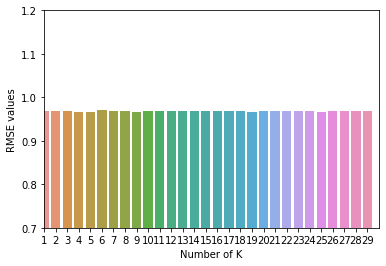

In [21]:
# Rmse Chart for User Based Collaborative filtering
series = pd.Series(name='rmse', data=RMSE_ub_CF_k)
ax = sns.barplot(series.index, series.values)
ax.set_ylabel('RMSE values')
ax.set_xlabel('Number of K')
ax.set_xlim(1, 30)
ax.set_ylim(.7, 1.2)

In [22]:
#Best K for Item Based Collaborative filtering
min_RMSE_index = np.argmin(RMSE_IB_CF_k)
print("Best K= ", min_RMSE_index+1)
print("Best RMSE= ", np.min(RMSE_IB_CF_k))

Best K=  30
Best RMSE=  0.9392253892016804


(0.7, 1.2)

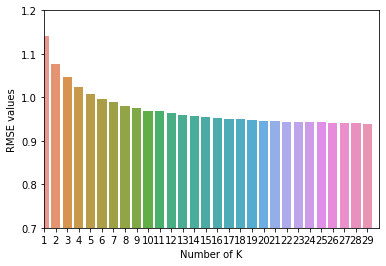

In [23]:
# Rmse Chart for Item Based Collaborative filtering
series = pd.Series(name='rmse', data=RMSE_IB_CF_k)
ax = sns.barplot(series.index, series.values)
ax.set_ylabel('RMSE values')
ax.set_xlabel('Number of K')
ax.set_xlim(1, 30)
ax.set_ylim(.7, 1.2)

(0.7, 1.2)

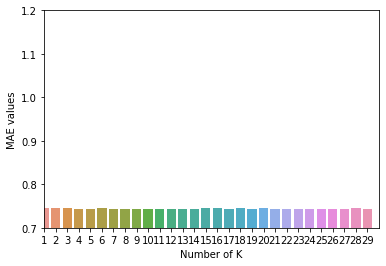

In [24]:
#mae chart for User based Collaborative filtering
series = pd.Series(name='mae', data=MAE_ub_CF_k)
ax = sns.barplot(series.index, series.values)
ax.set_ylabel('MAE values')
ax.set_xlabel('Number of K')
ax.set_xlim(1, 30)
ax.set_ylim(.7, 1.2)

(0.7, 1.2)

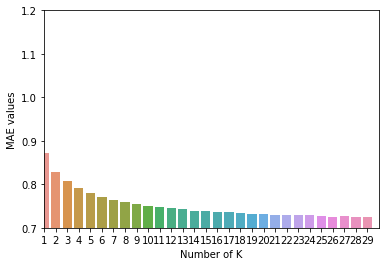

In [25]:
#mae chart for Item based Collaborative filtering
series = pd.Series(name='mae', data=MAE_IB_CF_k)
ax = sns.barplot(series.index, series.values)
ax.set_ylabel('MAE values')
ax.set_xlabel('Number of K')
ax.set_xlim(1, 30)
ax.set_ylim(.7, 1.2)